# Part I - (Prosper Loan Data)
## by (Naomi Kamweru)

## Introduction
> The dataset I'm investigating is the prosper loan data that contains information on loan listings and related variables like lender and borrower information.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# read the csv file
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
# Renaming some columns
loans = loans.rename(columns={'ProsperRating (numeric)':'ProsperRating','ProsperRating (Alpha)':'ProsperRatingAlpha'})

In [4]:
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
loans.shape

(113937, 81)

### What is the structure of your dataset?

> The dataset contains 113937 rows of data with 81 columns. 

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in knowing what variables affect the borrower APR and the original loan amount.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Some variables that are likely to affect BorrowerAPR include CreditGrade, ProsperRating and Occupation.

## Univariate Exploration

> Here, I begin with CreditGrade which is a categorial variable and will best be represented in a bar chart.


In [6]:
# Get the description of the BorrowerAPR column
desc = loans['BorrowerAPR'].describe()
desc = desc.drop('count')
desc

mean    0.218828
std     0.080364
min     0.006530
25%     0.156290
50%     0.209760
75%     0.283810
max     0.512290
Name: BorrowerAPR, dtype: float64

In [7]:
# Define a function to add the x and y labels and title to a plot
def addDesc(x,y,t):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)

### 1. What is the distribution of the Borrower APR?

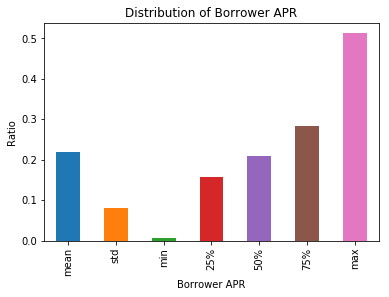

In [8]:
# A plot of the borrower APR description
desc.plot(kind='bar')
addDesc('Borrower APR','Ratio','Distribution of Borrower APR')



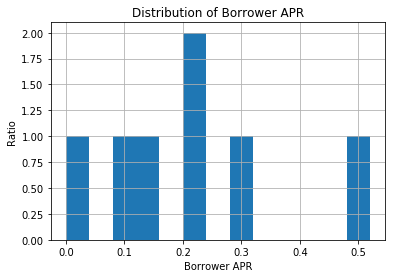

In [9]:
# A plot of the distribution of the borrower APR
binsize = 0.04
bins = np.arange(0, loans['BorrowerAPR'].max()+binsize, binsize)
desc.hist(bins=bins)
addDesc('Borrower APR','Ratio','Distribution of Borrower APR')


### 2. What is the distribution of the Credit Grades?

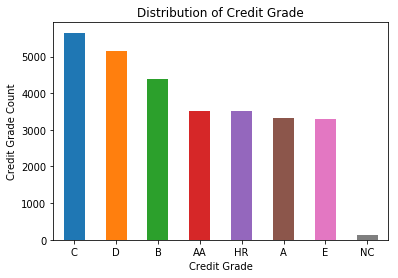

In [10]:
# PLot of the credit grade distribution
loans['CreditGrade'].value_counts().plot(kind='bar')
plt.xticks(rotation = 0)
addDesc('Credit Grade','Credit Grade Count','Distribution of Credit Grade')



### 3. What is the distribution of the Numeric Prosper Rating?

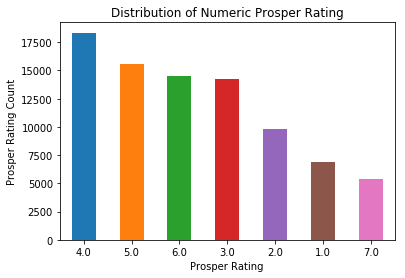

In [11]:
# Plot of the prosper numeric rating
loans['ProsperRating'].value_counts().plot(kind='bar')
plt.xticks(rotation = 0)
addDesc('Prosper Rating','Prosper Rating Count','Distribution of Numeric Prosper Rating')


### 4. What is the distribution of the Inquiries made in the last 6 months?

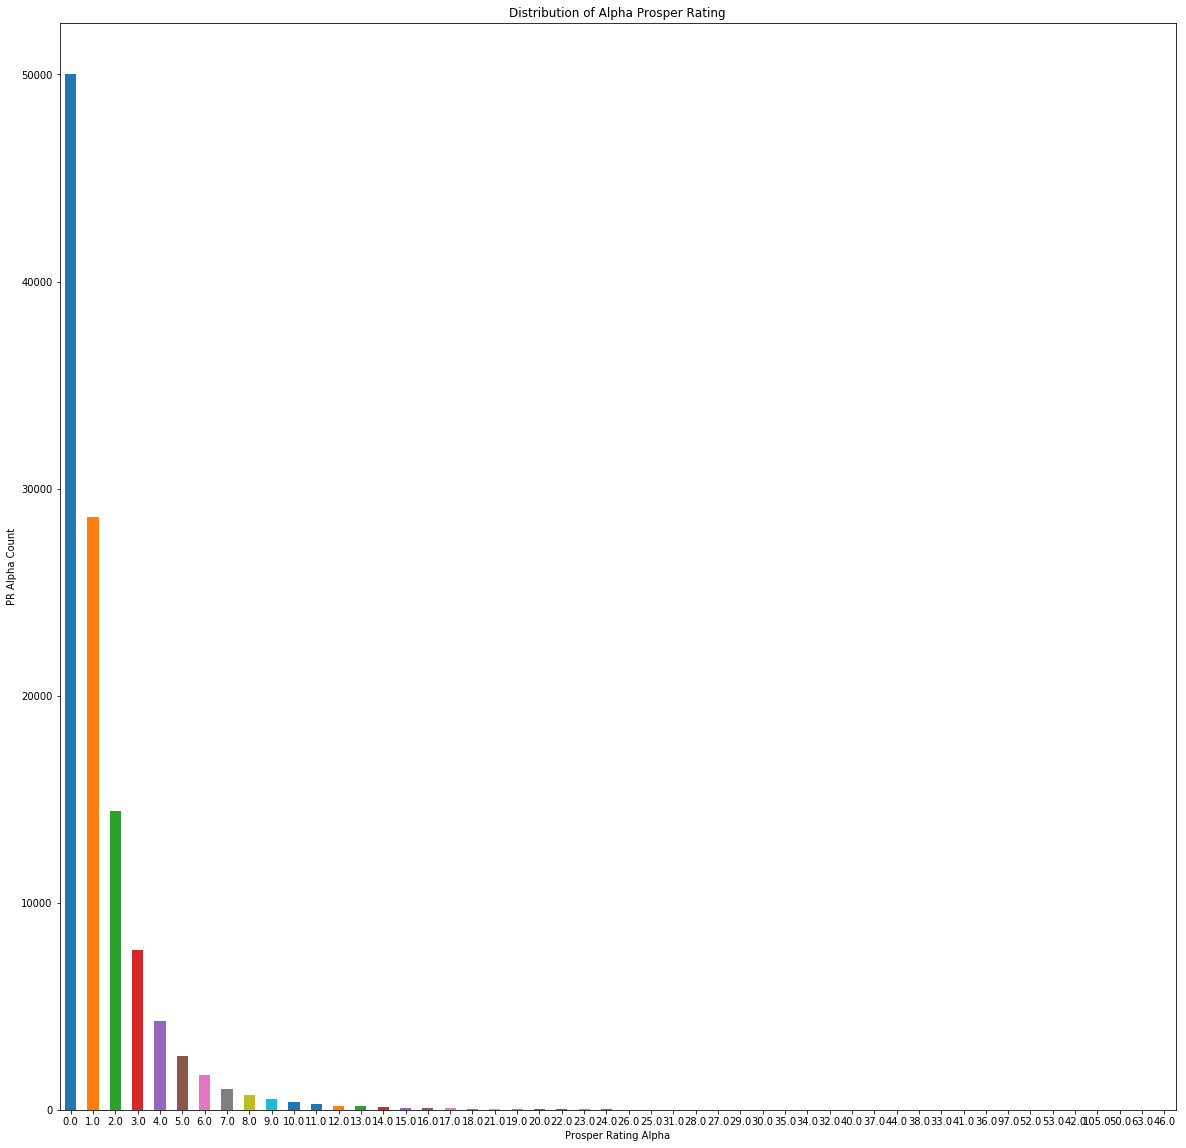

In [12]:
# Here we plot the distributions of the inquiries made in the last 6 months
loans['InquiriesLast6Months'].value_counts().plot(kind='bar', figsize=(20,20))
plt.xticks(rotation = 0)
addDesc('Prosper Rating Alpha','PR Alpha Count','Distribution of Alpha Prosper Rating')


### 5. What is the distribution of the Alpha Prosper Rating?

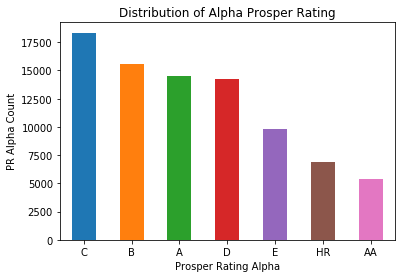

In [13]:
# A plot to show which prosper ratings have majority of the listings.
loans['ProsperRatingAlpha'].value_counts().plot(kind='bar')
plt.xticks(rotation = 0)
addDesc('Prosper Rating Alpha','PR Alpha Count','Distribution of Alpha Prosper Rating')


### 6. What is the distribution of the different occupations?

In [14]:
# Filtering the data for occupations count and counting the unnecessary fields
occupation = loans['Occupation'].value_counts()
occupation = occupation.drop(['Other','Professional'])
occupation

Computer Programmer                   4478
Executive                             4311
Teacher                               3759
Administrative Assistant              3688
Analyst                               3602
Sales - Commission                    3446
Accountant/CPA                        3233
Clerical                              3164
Sales - Retail                        2797
Skilled Labor                         2746
Retail Management                     2602
Nurse (RN)                            2489
Construction                          1790
Truck Driver                          1675
Laborer                               1595
Police Officer/Correction Officer     1578
Civil Service                         1457
Engineer - Mechanical                 1406
Military Enlisted                     1272
Food Service Management               1239
Engineer - Electrical                 1125
Food Service                          1123
Medical Technician                    1117
Attorney   

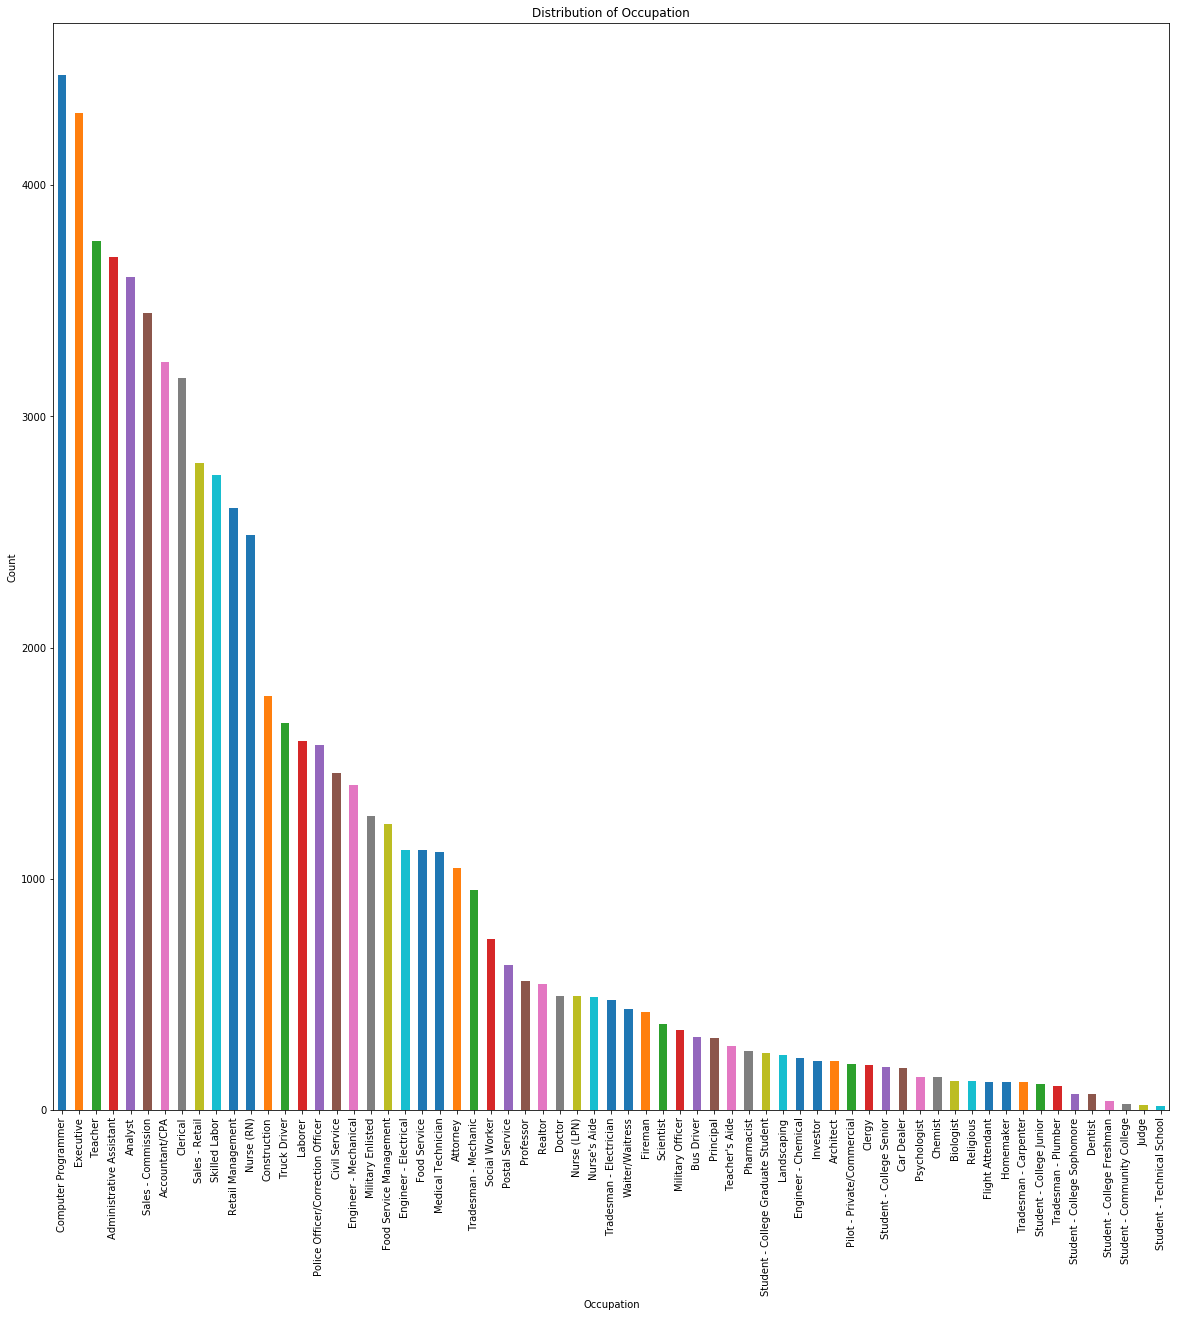

In [15]:
# A plot to show which occupation has majority of loan listings
occupation.plot(kind='bar', figsize=(20,20))
addDesc('Occupation','Count','Distribution of Occupation')


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 1. We note from the Distribution of Credit Grade visualization above that only a few borrowers were not graded by looking at the count of NC
> 2. Most listings have the numeric rating of 4 and an alpha rating of C
> 3. We notice that most borrowers in the listings are either Computer Programmers, executives or teachers while very few are judges and students
> 4. We also notice that most listings have had less than 10 inquiries made in the last 6 months. We also notice a right skewness which means that there have not been many inquiries in the past 6 months.
 
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Had to save the dataset description in a dataframe and drop count
> I also had to create a dataframe for Occupations and drop 'Others' and 'Professional' since it didn't give necessary information.

## Bivariate Exploration

> In this section, I will investigate the relationship between several pairs of variables in my data.

### 1. What is the relation between occupations and original loan amount?

In [16]:
# Here I create a new series showing the original loan amount
# grouped by the occupation
occ_amount = loans.groupby('Occupation')['LoanOriginalAmount'].mean()

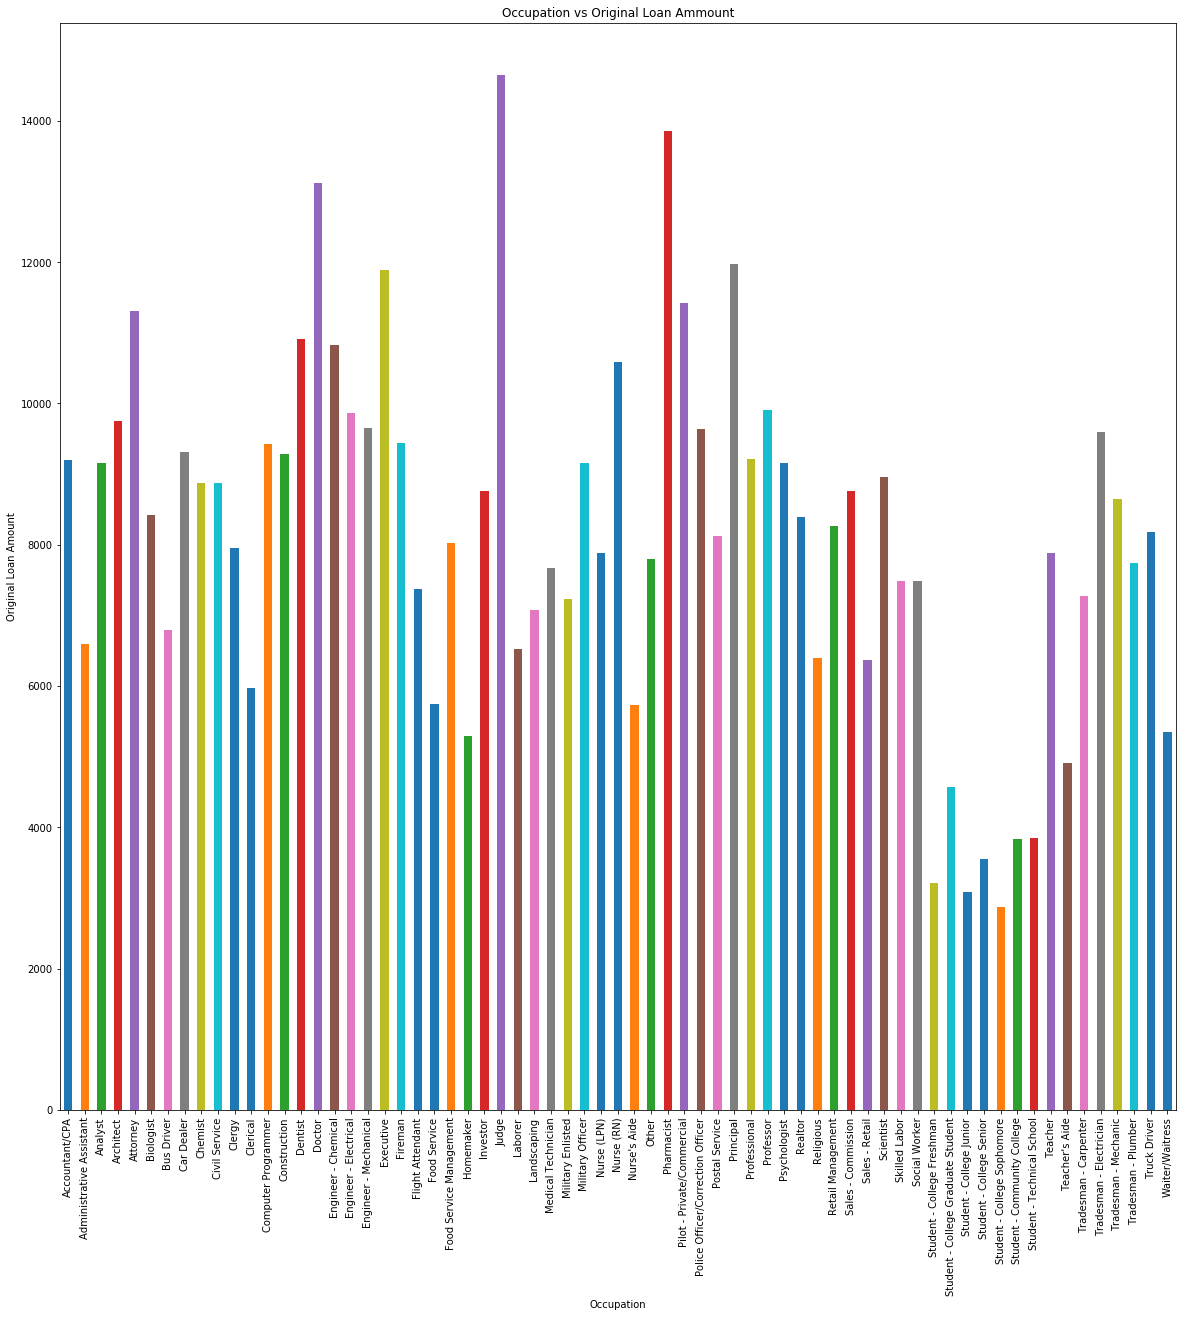

In [17]:
# A plot to show how the original loan amount differs according to the borrower's occupation
occ_amount.plot(kind='bar', figsize=(20,20))
addDesc('Occupation','Original Loan Amount','Occupation vs Original Loan Ammount')


### 2. What is the relation between occupation and monthly loan payment?

In [18]:
# Here I create a series showing the monthly loan payment grouped by occupation
occ_payment = loans.groupby('Occupation')['MonthlyLoanPayment'].mean()

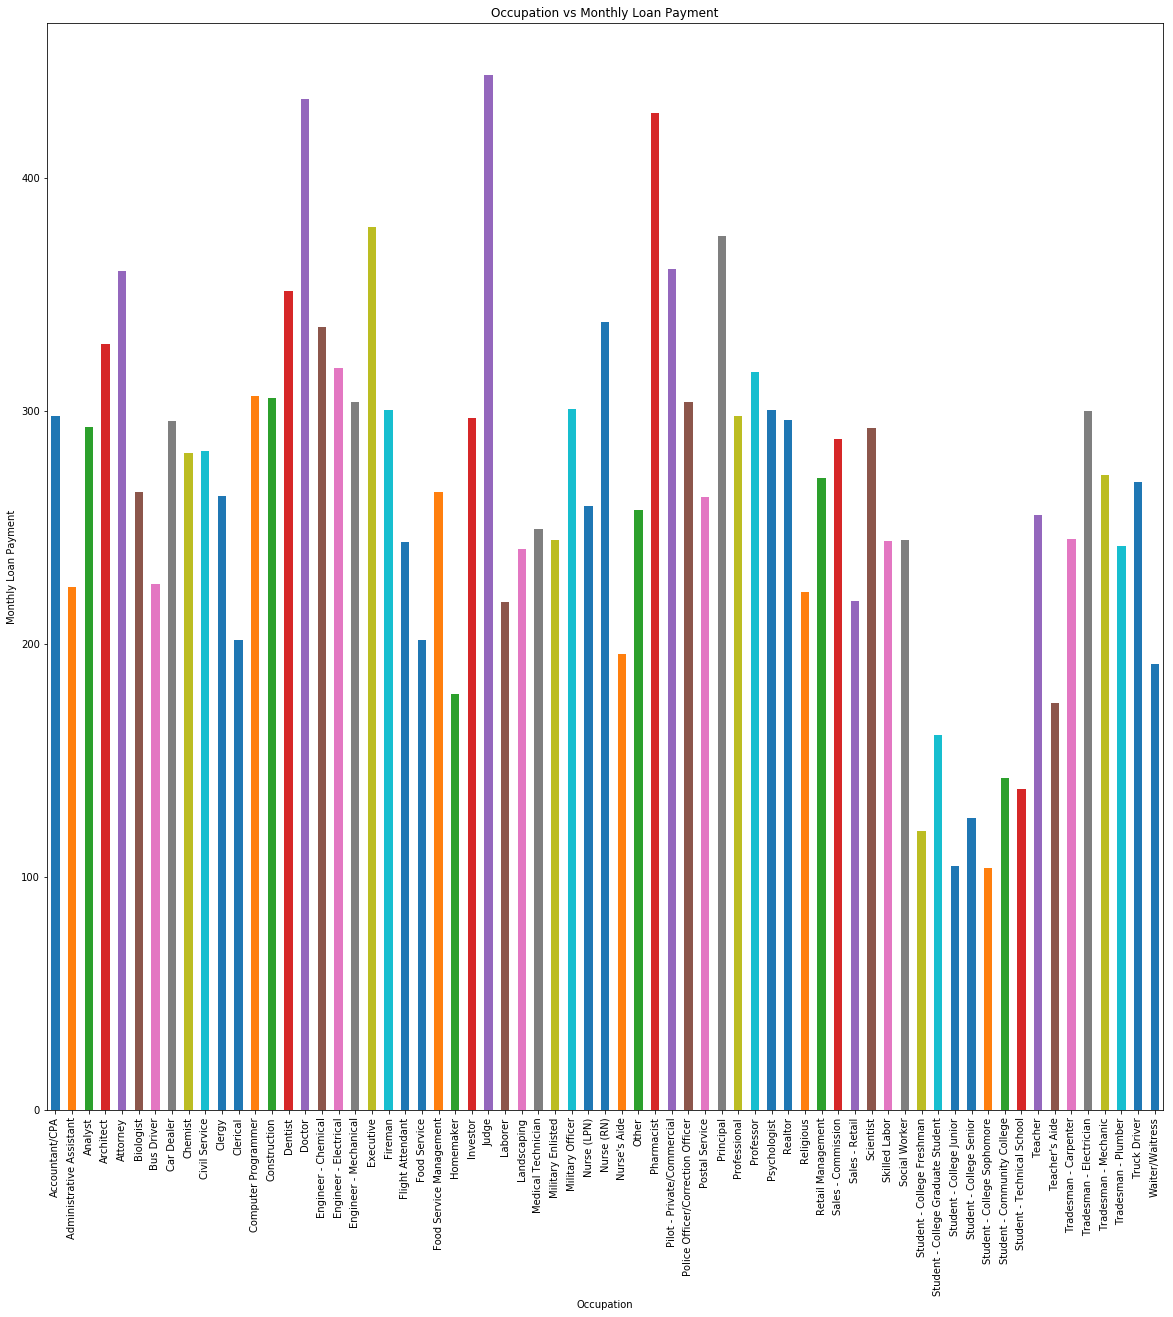

In [19]:
# A plot to show how the original loan amount differs according to the borrower's occupation
occ_payment.plot(kind='bar', figsize=(20,20))
addDesc('Occupation','Monthly Loan Payment','Occupation vs Monthly Loan Payment')


### 3. What is the relation between prosper alpha rating and the original loan amount?

In [20]:
# Here I create a series showing the original loan amount grouped by 
# Prosper Alpha Rating
Arating_amount = loans.groupby('ProsperRatingAlpha')['LoanOriginalAmount'].mean()

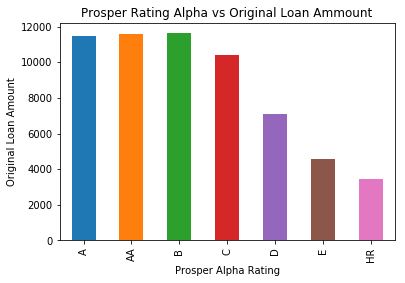

In [21]:
# A plot to show how the original loan amount differs according to the prosper alpha rating
Arating_amount.plot(kind='bar')
addDesc('Prosper Alpha Rating','Original Loan Amount','Prosper Rating Alpha vs Original Loan Ammount')


### 4. What is the relation between income range and the original loan amount?

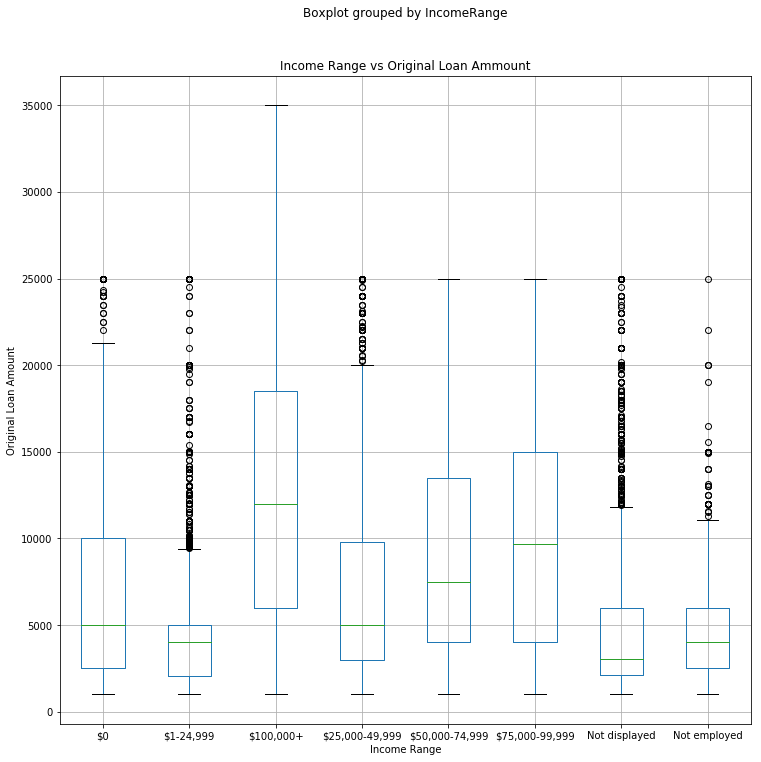

In [22]:
# A plot to show how the original loan amount differs according to the income range of a borrower
loans.boxplot(by ='IncomeRange', column=['LoanOriginalAmount'], figsize=(12,12))
addDesc('Income Range','Original Loan Amount','Income Range vs Original Loan Ammount')



### 5. What is the relation between alpha prosper rating and the original loan amount?

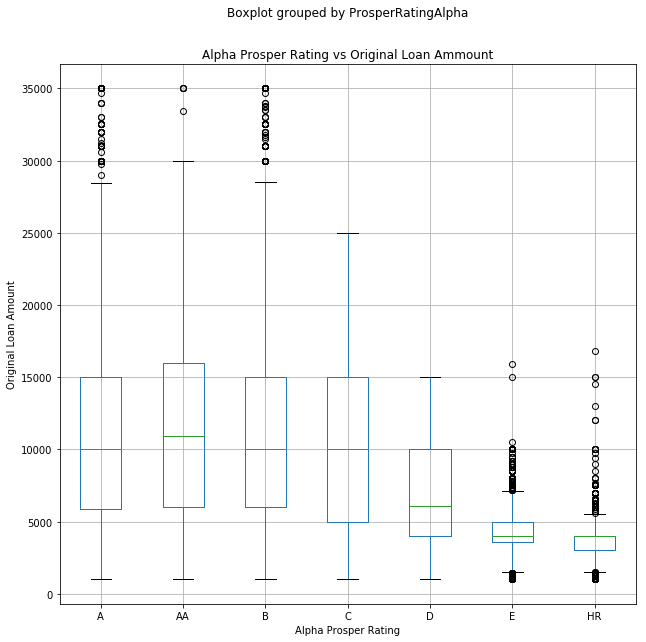

In [23]:
# A plot to show how the original loan amount differs according to the alpha prosper rating
loans.boxplot(by ='ProsperRatingAlpha', column=['LoanOriginalAmount'], figsize=(10,10))
addDesc('Alpha Prosper Rating','Original Loan Amount','Alpha Prosper Rating vs Original Loan Ammount')



### 6. What is the relation inquiries made in the past 6 months and original loan amount?

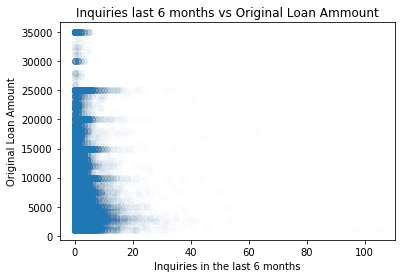

In [24]:
# A plot to show how the original loan amount differs according to the inquiries made in the last 6 months
plt.scatter(data=loans, x='InquiriesLast6Months', y='LoanOriginalAmount', alpha=1/100)
addDesc('Inquiries in the last 6 months','Original Loan Amount','Inquiries last 6 months vs Original Loan Ammount')


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1. From the bivariate analysis between occupation and the original loan amount, it is seen that Judges have the highest average loan amount. It shows that inspite of computer programmers having the highest amount of loan listings their loan amounts dont go up.
> 2. We also notice that loan listings with an Alpha Prosper Rating of A, AA and B have the highest original loan amounts. This means that the lower risk a borrower has, the higher the loan amount.
> 3. We note that people who have an income range of $100,000+$ have the highest average on original loan amounts but do not have many outliers followed by those with a range of $50,000-99,999$. Those in a range of $1-24,999$ have the most outliers
> 4. The occupations Judge, Doctor and pharmacist have the highest monthly loan payments
> 5. It is also noted that the high risk listings have many outliers but their mean and upper boundary for the original loan amount are not as high as the low risk listings

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I also compared the income range to the original loan amount

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### 1. How has the original loan amount changed per credit grade for the different income ranges?

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


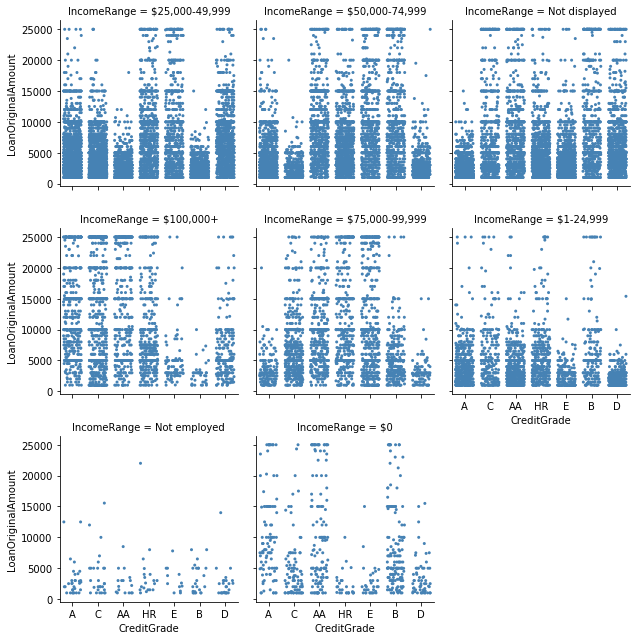

In [25]:
# Here I create a facet grid showing how the original loan amount has changed
# per credit grade for the different income ranges
g = sb.FacetGrid(loans, col='IncomeRange', col_wrap=3)
g.map(sb.stripplot, 'CreditGrade','LoanOriginalAmount', jitter=0.35,color='steelblue', s=3)

### 2. How does the BorrowerAPR change per credit grade for home owners and none home owners

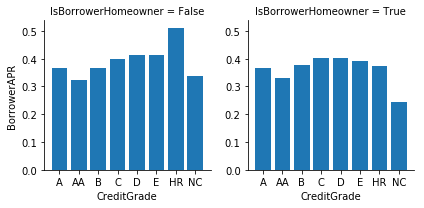

In [26]:
# Here I create a facet grid showing how the borrower APR has changed
# per credit grade for home owners and none home owners
g = sb.FacetGrid(loans, col='IsBorrowerHomeowner')
g.map(plt.bar, 'CreditGrade','BorrowerAPR')

### 3. How does the original loan amount change per credit grade for home owners and none home owners

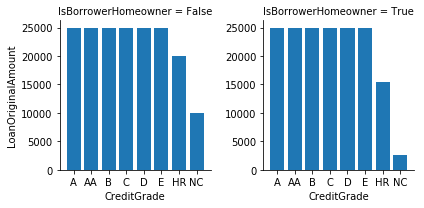

In [27]:
# A facet grid showing how the original loan amount has chnaged per credit grade
# for home owners and none home owners
g = sb.FacetGrid(loans, col='IsBorrowerHomeowner')
g.map(plt.bar, 'CreditGrade','LoanOriginalAmount')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 1. The fact that a borrower is a home owner or not does not affect the original loan amount, however we note that if a borrower is not a home owner and the listing has been marked as high risk the borrower APR is highest.
> 2. The outliers for the listings graded as low risk have more outliers than the ones listed as high risk regardless of the income range, however, the outliers for the borrowers who are not employed are way less than the rest. 

### Were there any interesting or surprising interactions between features?

> No

## Conclusions
>In this analysis, I have studied the effect of CreditGrade, Income Range, Occupation and Inquiries made in the last 6 months on Borrower APR and the original loan amount.
> I noted that the credit grade and prosper rating of a listing significantly affect the borrower APR and the original loan amount.
> A borrowers occupation also significantly affects the original loan amount and the monthly loan payment where we see students having the lowest monthly loan payment
